In [8]:
    #Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [13]:
# reading dataset
data = pd.read_csv('/Users/vaibhav/Downloads/Darknet.csv', on_bad_lines='skip')

data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [14]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [15]:
data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,141530.000000,141530.000000,141530.000000,1.415300e+05,141530.000000,141530.000000,1.415300e+05,1.415300e+05,141530.000000,141530.000000,...,141530.000000,141530.000000,141530.0,141530.0,141530.0,141530.0,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05
mean,38450.268819,18124.647333,10.350427,2.081280e+07,152.800749,154.642062,1.126211e+05,1.304530e+05,208.920420,15.617078,...,96.881573,15.808182,0.0,0.0,0.0,0.0,7.027739e+14,5.525971e+13,7.305706e+14,5.993941e+14
std,19124.801990,22202.197159,5.431807,3.809155e+07,2378.323352,3418.715287,3.251357e+06,4.566180e+06,649.432333,31.312298,...,1582.814902,7.110714,0.0,0.0,0.0,0.0,7.058343e+14,1.930081e+14,7.248022e+14,7.138123e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32425.500000,80.000000,6.000000,1.778100e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43528.000000,5355.000000,6.000000,4.162820e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,34.000000,0.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,7.281252e+14,0.000000e+00,1.427725e+15,5.584614e+06
75%,53338.000000,40020.000000,17.000000,1.181470e+07,4.000000,3.000000,2.160000e+02,2.160000e+02,103.000000,31.000000,...,2.000000,20.000000,0.0,0.0,0.0,0.0,1.456263e+15,1.031457e+07,1.456323e+15,1.456263e+15
max,65534.000000,65535.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,113325.000000,44.000000,0.0,0.0,0.0,0.0,1.456417e+15,1.029836e+15,1.456417e+15,1.456417e+15


In [17]:
data.dtypes

Flow ID      object
Src IP       object
Src Port      int64
Dst IP       object
Dst Port      int64
             ...   
Idle Std    float64
Idle Max    float64
Idle Min    float64
Label        object
Label.1      object
Length: 85, dtype: object

In [18]:
#Checking for null vaues

data.isnull().values.any()

True

In [19]:
#Total number of null values

data.isnull().values.sum()

47

In [21]:
#index of null values
df_percent_null_values=(data.isnull().sum()*100)/len(data)
for i in df_percent_null_values:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03320850703031159
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [22]:
#As the volume of null values is small, thus dropping those
data.dropna(axis = 0, inplace = True)

In [23]:
data.isnull().values.any()

False

In [24]:
#Dropping duplicated values
data = data.loc[:,~data.columns.duplicated()]

In [25]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [26]:
data['Label'] = data['Label'].astype('str') 
data['Label'].dtype
data['Label'] = data['Label'].apply(lambda name : name.upper())

In [27]:
data['Label.1'] = data['Label.1'].astype('str') 
data['Label.1'].dtype
data['Label.1'] = data['Label.1'].apply(lambda name : name.upper())

In [29]:
#Converting categorical values into numerical values using label encoder
labelencoder= LabelEncoder()
data['Label'] = labelencoder.fit_transform(data['Label'])

In [30]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,0,AUDIO-STREAMING


In [31]:
#Finding correlation among columns
cor = data.corr()
cor.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Src Port,1.000000,-0.245809,-0.097933,0.065040,-0.036318,-0.014283,-0.019744,-0.008293,0.076338,-0.090378,...,0.138797,NaN,NaN,NaN,NaN,0.072765,0.058493,0.077321,0.030841,-0.049322
Dst Port,-0.245809,1.000000,-0.320981,0.039493,0.022131,0.014801,0.004468,0.010882,0.004597,-0.178557,...,0.246108,NaN,NaN,NaN,NaN,0.070286,-0.000575,0.064880,0.060534,-0.291576
Protocol,-0.097933,-0.320981,1.000000,-0.267141,-0.034756,-0.026179,-0.023051,-0.020883,-0.195232,0.563995,...,-0.872453,NaN,NaN,NaN,NaN,-0.223181,-0.155938,-0.236922,-0.129683,0.404986
Flow Duration,0.065040,0.039493,-0.267141,1.000000,0.142106,0.100285,0.072527,0.057006,0.340708,-0.069027,...,0.240543,NaN,NaN,NaN,NaN,0.505264,0.127529,0.506001,0.408922,-0.069622
Total Fwd Packet,-0.036318,0.022131,-0.034756,0.142106,1.000000,0.744834,0.457390,0.635688,0.125570,-0.020993,...,0.029666,NaN,NaN,NaN,NaN,0.066390,-0.017742,0.062253,0.074029,0.039563


In [32]:
#deleting columns which have r-value>9
col_cor = set()
for i in range(len(cor.columns)):
      for j in range(i):
        if (abs(cor.iloc[i,j]>=0.8)) and (cor.columns[j] not in col_cor):
            col_name = cor.columns[i]
            col_cor.add(col_name)
            

print("cols are: ",col_cor)
print("no of features: ", len(col_cor))

cols are:  {'Fwd Packet Length Std', 'Total Length of Bwd Packet', 'Fwd Packets/s', 'Bwd Header Length', 'Fwd IAT Max', 'Bwd Segment Size Avg', 'Fwd Segment Size Avg', 'Fwd IAT Mean', 'Flow IAT Max', 'Fwd IAT Total', 'Bwd IAT Total', 'Bwd Packet/Bulk Avg', 'Bwd Packets/s', 'Idle Max', 'Bwd IAT Mean', 'Fwd Header Length', 'Subflow Bwd Bytes', 'Packet Length Max', 'Packet Length Std', 'Subflow Fwd Bytes', 'ACK Flag Count', 'Idle Min', 'Average Packet Size', 'Bwd Packet Length Std'}
no of features:  24


In [33]:
data= data.drop(col_cor,axis=1)

In [34]:
data.shape

(141483, 61)

In [35]:
#Finding inter quartile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print("The IQR of all data: ",IQR)

The IQR of all data:  Src Port                      2.083500e+04
Dst Port                      3.994000e+04
Protocol                      1.100000e+01
Flow Duration                 1.182233e+07
Total Fwd Packet              3.000000e+00
Total Bwd packets             3.000000e+00
Total Length of Fwd Packet    2.160000e+02
Fwd Packet Length Max         1.030000e+02
Fwd Packet Length Min         3.100000e+01
Fwd Packet Length Mean        4.500000e+01
Bwd Packet Length Max         2.130000e+02
Bwd Packet Length Min         0.000000e+00
Bwd Packet Length Mean        9.700000e+01
Flow Bytes/s                  9.908260e+02
Flow Packets/s                3.950545e+02
Flow IAT Mean                 1.879835e+06
Flow IAT Std                  2.213898e+06
Flow IAT Min                  1.291215e+05
Fwd IAT Std                   1.441643e+06
Fwd IAT Min                   1.026500e+05
Bwd IAT Std                   4.602714e+04
Bwd IAT Max                   7.352025e+05
Bwd IAT Min                   3.

In [36]:
#Dropping the outliers
df_new = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]
df_new.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Label,Label.1
1087,10.152.152.11-37.252.170.75-47033-443-6,10.152.152.11,47033,37.252.170.75,443,6,24/02/2016 02:09:59 PM,2385503,3,0,...,1,20,0,0,0,0,0.0,0.0,0,BROWSING
1130,10.152.152.11-216.58.209.130-41698-80-6,10.152.152.11,41698,216.58.209.130,80,6,24/02/2016 02:11:31 PM,2535,1,1,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING
3627,10.152.152.11-195.138.255.8-37790-80-6,10.152.152.11,37790,195.138.255.8,80,6,24/02/2016 02:25:07 PM,4316,1,1,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING
4241,10.152.152.11-68.171.169.171-58871-80-6,10.152.152.11,58871,68.171.169.171,80,6,24/02/2016 01:37:02 PM,12951,2,0,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING
4242,10.152.152.11-174.123.37.171-45179-80-6,10.152.152.11,45179,174.123.37.171,80,6,24/02/2016 01:37:02 PM,17742,2,0,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING


In [37]:
df_new.shape

(9014, 61)

In [ ]:
# Feature Engineering and selection

In [38]:
df_new.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Label,Label.1
1087,10.152.152.11-37.252.170.75-47033-443-6,10.152.152.11,47033,37.252.170.75,443,6,24/02/2016 02:09:59 PM,2385503,3,0,...,1,20,0,0,0,0,0.0,0.0,0,BROWSING
1130,10.152.152.11-216.58.209.130-41698-80-6,10.152.152.11,41698,216.58.209.130,80,6,24/02/2016 02:11:31 PM,2535,1,1,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING
3627,10.152.152.11-195.138.255.8-37790-80-6,10.152.152.11,37790,195.138.255.8,80,6,24/02/2016 02:25:07 PM,4316,1,1,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING
4241,10.152.152.11-68.171.169.171-58871-80-6,10.152.152.11,58871,68.171.169.171,80,6,24/02/2016 01:37:02 PM,12951,2,0,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING
4242,10.152.152.11-174.123.37.171-45179-80-6,10.152.152.11,45179,174.123.37.171,80,6,24/02/2016 01:37:02 PM,17742,2,0,...,0,20,0,0,0,0,0.0,0.0,0,BROWSING


In [39]:
print(df_new.columns[:])

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Std',
       'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Packet Length Min', 'Packet Length Mean', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',
       'Bwd Bytes/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets',
       'Subf

In [ ]:
## Dropping Features

In [40]:
#from the above set of the features , The below features can discarded as those less importance and cannot contribute to the 
#desired prediction task

#1 Flow ID
#2 Src IP   
#3 Dst IP  
#4 Timestamp

X2= df_new
X = df_new[df_new.columns[:-1]]
X=X.drop(['Flow ID','Src IP','Dst IP','Timestamp'],axis=1)
X2=X2.drop(['Flow ID','Src IP','Dst IP','Timestamp'],axis=1)
X_col_names=X.columns

In [ ]:
#Anomaly Detection using Isolation Forest

In [41]:
from sklearn.ensemble import IsolationForest

random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

for col in X.columns:
        model.fit(X[[col]])
        print("Result of " + col + ":")
        print(model.get_params())

Result of Src Port:
{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F9EEF9F3240, 'verbose': 0, 'warm_start': False}
Result of Dst Port:
{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F9EEF9F3240, 'verbose': 0, 'warm_start': False}
Result of Protocol:
{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F9EEF9F3240, 'verbose': 0, 'warm_start': False}
Result of Flow Duration:
{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F9EEF9F3240, 'verbose': 0, 'warm_start': False}
Result of Total Fwd Packet:
{'bootstrap': False, 'conta

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn import preprocessing 
import imblearn
from imblearn.over_sampling import SMOTE

# Splitting the features and the target classes
Xn=np.asarray(X)[:]
Y = df_new['Label.1'][:]

# Encoding the labels of the Target classes
le = preprocessing.LabelEncoder().fit(Y)
Yn= Y = le.transform(Y)
print(np.shape(Xn), np.shape(Yn))


# Splitting the dataset into test train split
X_train, X_test, y_train, y_test = train_test_split(Xn, Yn, test_size=0.20, shuffle=True)

#applying SMOTE (Synthetic Minority Oversampling Technique) to overcome the imbalanced classification by to oversample the minority class
smote= SMOTE('auto')
X_sm,y_sm = smote.fit_resample(X_train, y_train)
print(np.shape(X_sm), np.shape(y_sm))

# saving the output labels in a dictionary format
dic = {}
for i in y_sm:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
print(dic)

(9014, 56) (9014,)
(52288, 56) (52288,)
{5: 6536, 6: 6536, 7: 6536, 4: 6536, 2: 6536, 0: 6536, 3: 6536, 1: 6536}


In [ ]:
# Selection of useful features using SelectKBest Class

In [43]:
#SelectKBest class that can be used with a suite of different statistical tests  to select a specific number of features.
#chi-squared (chi²) statistical test for non-negative features to select best useful features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_ordered_rank_feat = SelectKBest(score_func=chi2, k='all')
X_ordered_feat= X_ordered_rank_feat.fit(X_sm, y_sm)

In [44]:
dfscores=pd.DataFrame(X_ordered_feat.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X_col_names)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

# Feature vs score i.e its effect on target variable
features_rank.columns=['Features','Score']
features_rank.sort_values(by=['Score'],ascending= False)

,Features,Score
53,Idle Mean,1.368875e+18
3,Flow Duration,6.341597e+09
18,Fwd IAT Std,6.161939e+09
16,Flow IAT Std,5.834522e+09
15,Flow IAT Mean,2.316748e+09
1,Dst Port,9.897979e+08
19,Fwd IAT Min,9.366745e+08
17,Flow IAT Min,3.329622e+08
45,FWD Init Win Bytes,2.410646e+08
0,Src Port,5.174495e+07


In [ ]:
# Feature Importance

In [45]:
#Feature importance is an inbuilt class that comes with Tree Based Classifiers, 
#we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_sm,y_sm)

ExtraTreesClassifier()

In [46]:
 #use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

[1.02667226e-01 8.75115867e-02 8.88756534e-03 3.92691571e-02
 2.00406200e-02 1.57802794e-02 1.02427646e-02 1.76588262e-02
 4.68101300e-03 9.71879440e-03 1.14158521e-03 0.00000000e+00
 1.80085228e-03 2.00784504e-02 5.52656799e-02 4.32128606e-02
 8.69922656e-03 5.12653977e-02 9.10828938e-03 2.71527897e-02
 0.00000000e+00 7.39766290e-04 6.21532131e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.80331588e-03
 9.49496536e-03 1.27195038e-02 4.02852499e-02 0.00000000e+00
 0.00000000e+00 2.25219127e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.54823615e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.26598106e-02
 0.00000000e+00 6.82848650e-02 2.90795784e-02 1.58137980e-02
 5.67701278e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.31012509e-04 1.28524320e-04 1.57780711e-01]


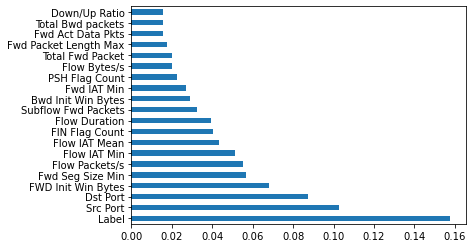

In [47]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index= X_col_names)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
# from the available top 20 features , most useful features are considered and were used for extermely important for model building 

feats=['Label' ,'Dst Port','Fwd Seg Size Min','Src Port','FWD Init Win Bytes','Total Fwd Packet','Bwd Init Win Bytes','Flow Duration', 'Flow IAT Mean','Total Bwd packets',
'FIN Flag Count','Flow Bytes/s','Packet Length Mean','Total Length of Fwd Packet','Fwd Packet Length Mean','Down/Up Ratio','Fwd IAT Std','Packet Length Variance']


In [ ]:
# PCA

In [49]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data.shape

(9014, 56)

In [51]:
pca = PCA(n_components=5)

x_train_data_transformed = pca.fit_transform(scaled_data)

print(x_train_data_transformed.shape)

data_transformed = pd.DataFrame(x_train_data_transformed, columns = ['PCA1', 'PCA2','PCA3', 'PCA4','PCA5'])
data_concat = pd.concat([df_new, data_transformed], axis = 1)


#explained_variane
print(pca.explained_variance_ratio_)

(9014, 5)
[0.24262792 0.17561692 0.12905467 0.092327   0.06891809]


In [52]:

pca.components_

array([[-9.49640030e-02, -5.21816814e-02,  2.88836756e-01,
         2.86173034e-02,  2.09013442e-03, -1.05249636e-02,
         3.35340838e-01,  3.34712327e-01,  3.08349082e-01,
         3.31102765e-01,  3.31061090e-02, -0.00000000e+00,
         3.31061090e-02,  2.69443529e-01, -3.66292280e-03,
         3.22041009e-02,  1.96955089e-02,  2.74900193e-02,
         2.10900833e-02,  3.05988441e-02, -0.00000000e+00,
         1.07827006e-02,  1.07827006e-02, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         3.08349082e-01,  3.29136221e-01,  1.99862200e-01,
        -8.87464949e-02, -0.00000000e+00, -0.00000000e+00,
         1.41668113e-01, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -1.30004098e-02, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  1.57003571e-02, -0.00000000e+00,
         8.02255747e-02, -4.16872597e-03,  3.06118846e-01,
        -1.25492931e-01, -0.00000000e+00, -0.00000000e+0

<AxesSubplot:>

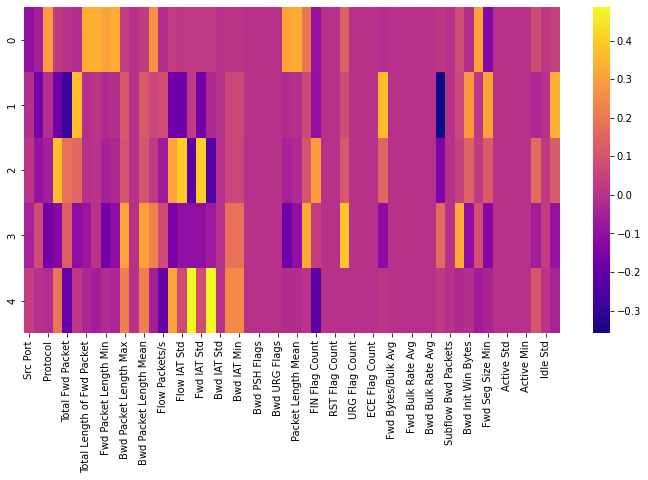

In [53]:
df_comp = pd.DataFrame(pca.components_,columns= X_col_names)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [ ]:
# Clustering

In [54]:

X = df_new[df_new.columns[:]]
X=X.drop(['Flow ID','Src IP','Dst IP','Timestamp'],axis=1)
#X_new=X
X_new=X[['Src Port','Dst Port','FWD Init Win Bytes','Flow Packets/s','Flow Duration' ,'Fwd Seg Size Min','Bwd Init Win Bytes','FIN Flag Count']]
X_col_names=X.columns
X_new.head()

,Src Port,Dst Port,FWD Init Win Bytes,Flow Packets/s,Flow Duration,Fwd Seg Size Min,Bwd Init Win Bytes,FIN Flag Count
1087,47033,443,1773,1.257596,2385503,20,0,1
1130,41698,80,1047,788.954635,2535,20,1161,2
3627,37790,80,980,463.392030,4316,20,980,1
4241,58871,80,980,154.428229,12951,20,0,1
4242,45179,80,980,112.726863,17742,20,0,1


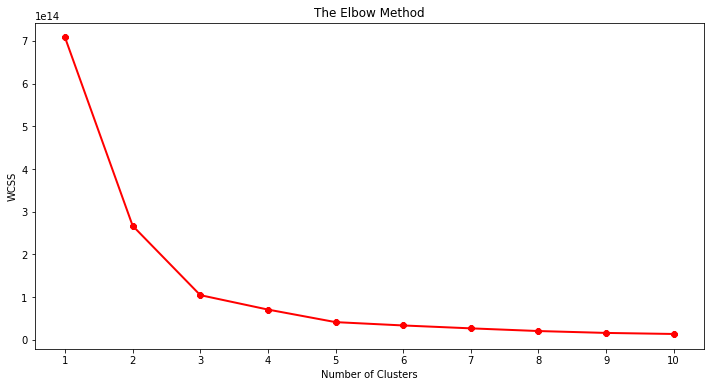

In [55]:
from sklearn.cluster import KMeans

X = data_transformed

wcss=[]
X.head()
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_new)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))   
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('The Elbow Method')
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [56]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data_transformed)



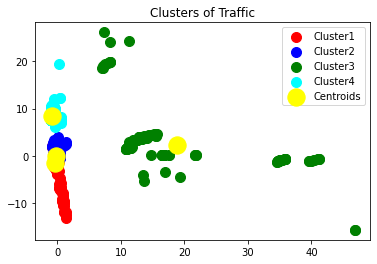

In [57]:
#Visualize the clusters
X = np.array(data_transformed )  #that all
plt.scatter(X[y_kmeans== 0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans== 1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans== 2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans== 3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
#plt.scatter(X[y_kmeans== 4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of Traffic')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [58]:
range_n_clusters = [2,3,4,5,6]

For n_clusters = 2 The average silhouette_score is : 0.8449484590562996
For n_clusters = 3 The average silhouette_score is : 0.7281709829988612
For n_clusters = 4 The average silhouette_score is : 0.7331194899628563
For n_clusters = 5 The average silhouette_score is : 0.5877225007442498
For n_clusters = 6 The average silhouette_score is : 0.5941861023412836


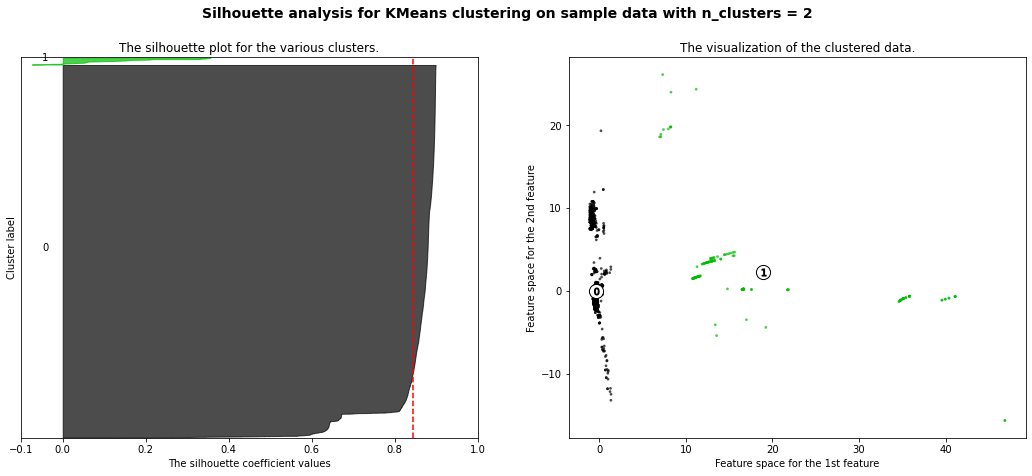

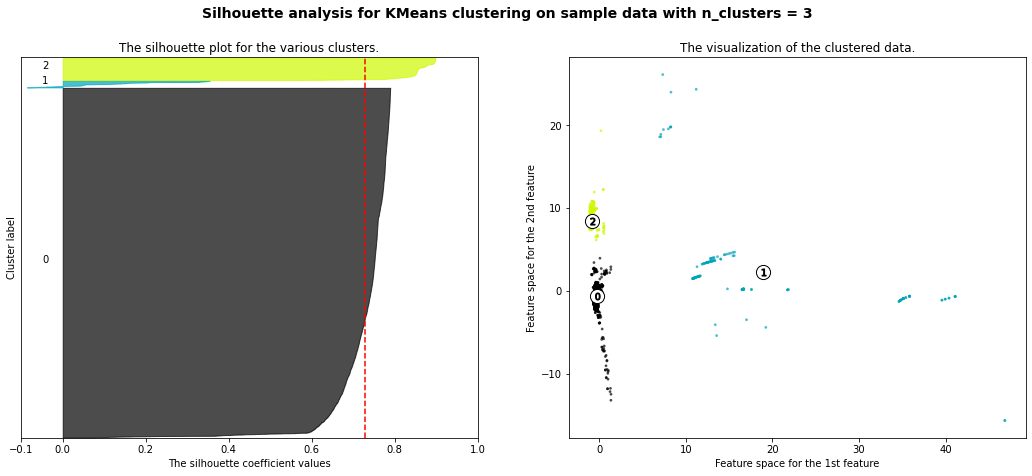

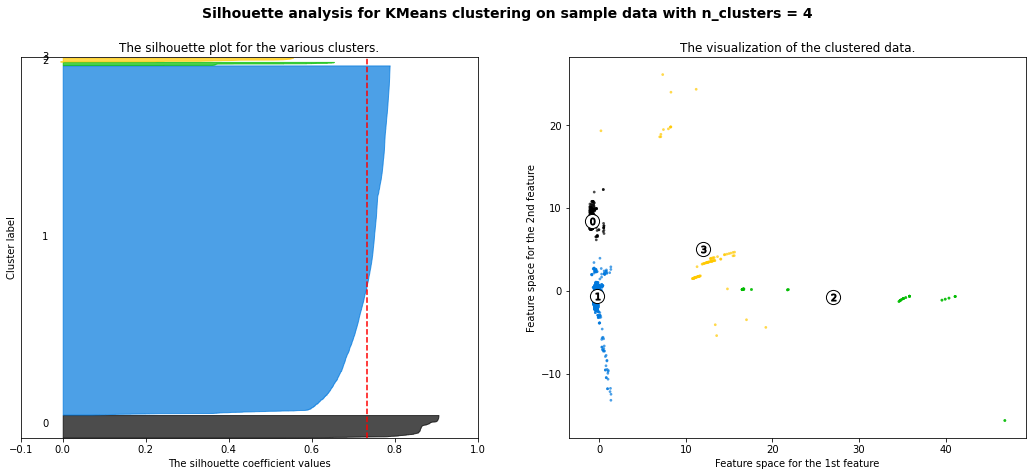

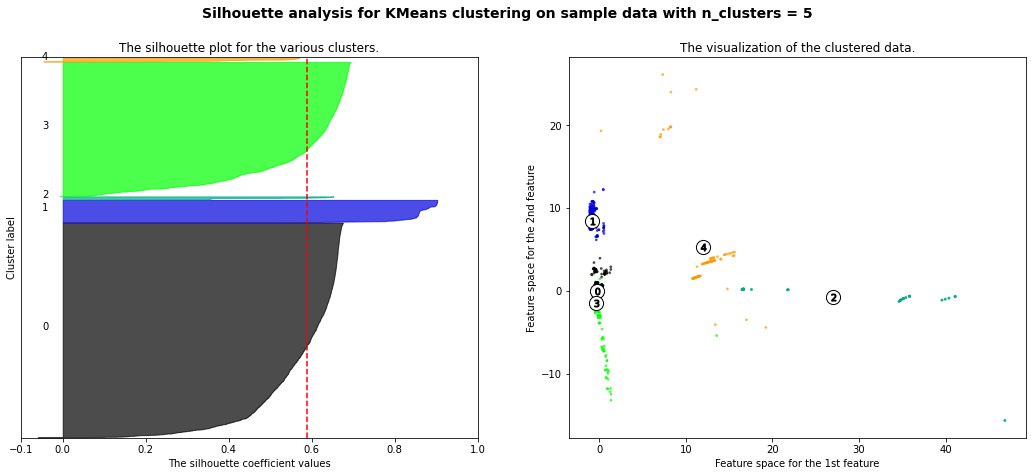

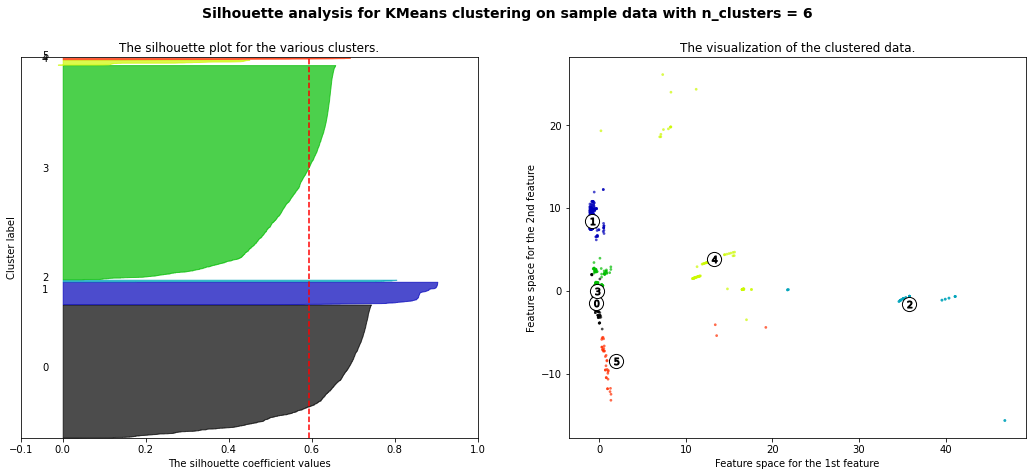

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#Classification and Model Building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2022-11-28 14:05:20.999412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:

df_X_train = pd.DataFrame(X_sm,columns=X_col_names[:-1])

feats=['Label' ,'Dst Port','Fwd Seg Size Min','Src Port','FWD Init Win Bytes','Total Fwd Packet','Bwd Init Win Bytes','Flow Duration', 'Flow IAT Mean','Total Bwd packets',
'FIN Flag Count','Flow Bytes/s','Packet Length Mean','Total Length of Fwd Packet','Fwd Packet Length Mean','Down/Up Ratio','Fwd IAT Std','Packet Length Variance']

X_train_filtered=df_X_train[feats]
#X_train_filtered=df_X_train
X_train = np.array(X_train_filtered)


df_X_test = pd.DataFrame(X_test,columns=X_col_names[:-1])
X_test_filtered=df_X_test[feats]
#X_test_filtered=df_X_test
X_test = np.array(X_test_filtered)
y_train=y_sm


In [ ]:
#Decision Tree

In [62]:
print("Starting to train")
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

Starting to train


DecisionTreeClassifier()

In [63]:
dt.tree_.node_count, dt.tree_.max_depth

(1683, 25)

In [64]:
dt.score(X_test, y_test)

0.9683860232945092

In [65]:
y_pred = dt.predict(X_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print("Classes: ", le.inverse_transform([0,1,2,3,4,5,6]))
print(classification_report(y_test, y_pred, target_names= le.inverse_transform([0,1,2,3,4,5,6]), labels=range(8)))

accuracy 0.9683860232945092
Classes:  ['AUDIO-STREAMING' 'BROWSING' 'CHAT' 'EMAIL' 'FILE-TRANSFER' 'P2P'
 'VIDEO-STREAMING']
                 precision    recall  f1-score   support

AUDIO-STREAMING       0.49      0.81      0.61        27
       BROWSING       0.47      0.54      0.50        13
           CHAT       0.78      0.70      0.74        10
          EMAIL       0.85      1.00      0.92        17
  FILE-TRANSFER       0.57      0.52      0.55        23
            P2P       1.00      1.00      1.00      1622
VIDEO-STREAMING       0.84      0.66      0.74        89

       accuracy                           0.97      1803
      macro avg       0.71      0.78      0.73      1803
   weighted avg       0.97      0.97      0.97      1803



In [67]:
#confusion matrix graph
#utility function taken from online reference
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


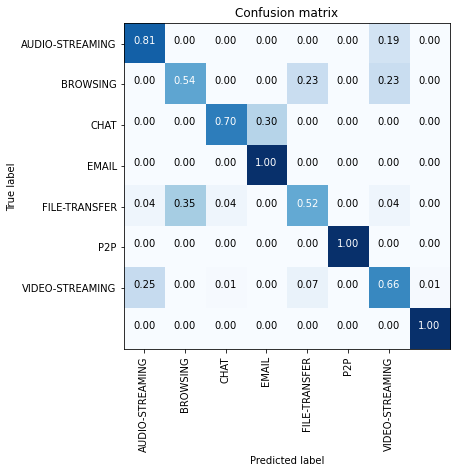

In [68]:
import itertools
fig = plt.figure()
fig.set_size_inches(6, 6, forward=True)
fig.align_labels()

plot_confusion_matrix(confusion_matrix(y_test, y_pred), normalize=True,
                      title='Confusion matrix', classes= le.inverse_transform([0,1,2,3,4,5,6]))
fig.show()

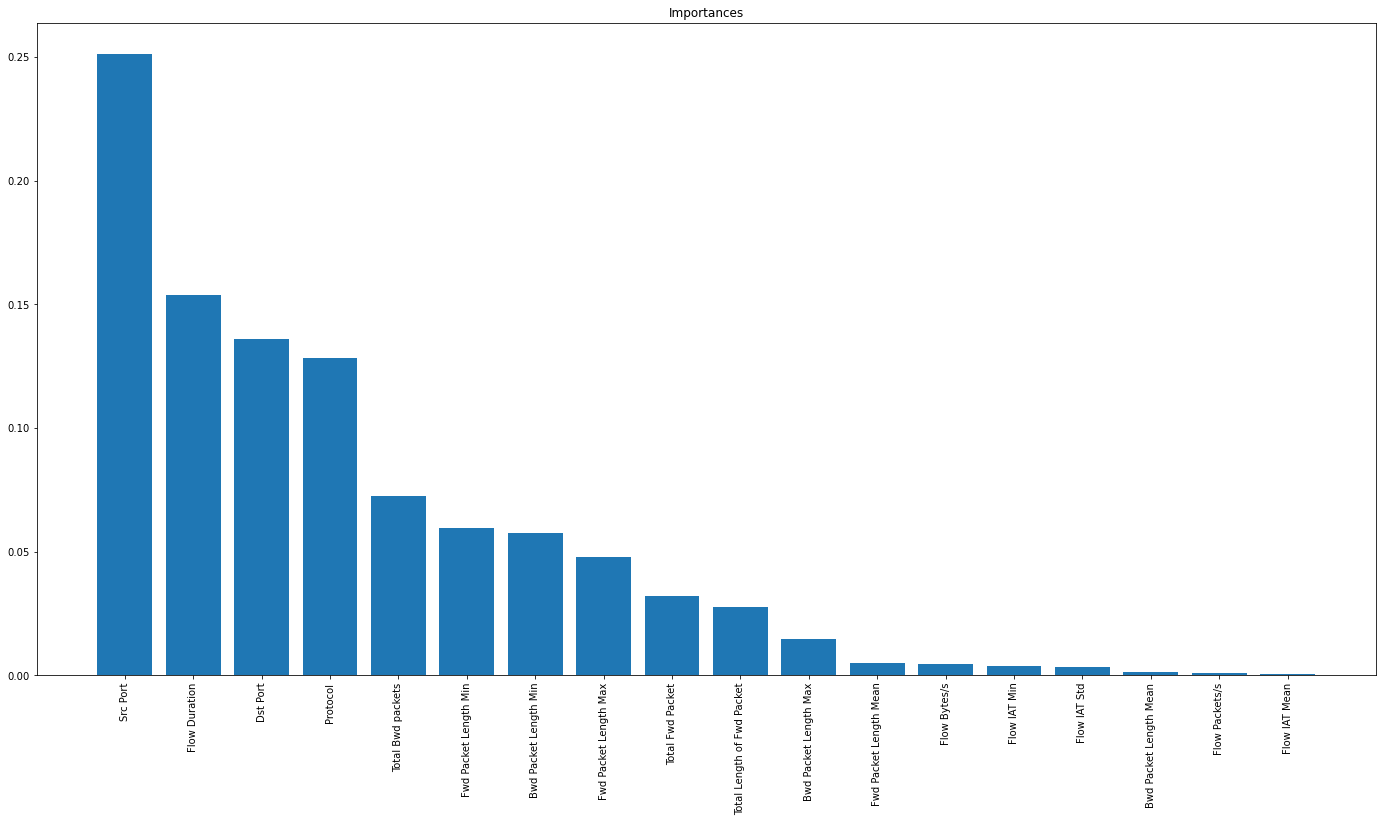

In [69]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_col_names[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.savefig("DT_features.png")

In [ ]:
#KNN Model

In [70]:
max = 0
error_rate = []
for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    #print("Training Started")
    knn.fit(X_train, y_train)

    #print("Testing the classifier")
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    error_rate.append(np.mean(y_pred != y_test))
    print(f'K={i} accuracy %s' % acc)

K=2 accuracy 0.9317803660565723
K=3 accuracy 0.9339988907376594
K=4 accuracy 0.9306711037160288
K=5 accuracy 0.9334442595673876
K=6 accuracy 0.9323349972268441
K=7 accuracy 0.9323349972268441
K=8 accuracy 0.9306711037160288
K=9 accuracy 0.9317803660565723
K=10 accuracy 0.9273433166943982
K=11 accuracy 0.9273433166943982
K=12 accuracy 0.9262340543538546
K=13 accuracy 0.9251247920133111
K=14 accuracy 0.9201331114808652
K=15 accuracy 0.9195784803105934
K=16 accuracy 0.9151414309484193
K=17 accuracy 0.9162506932889628
K=18 accuracy 0.9145867997781475
K=19 accuracy 0.9145867997781475


Text(0, 0.5, 'Error Rate')

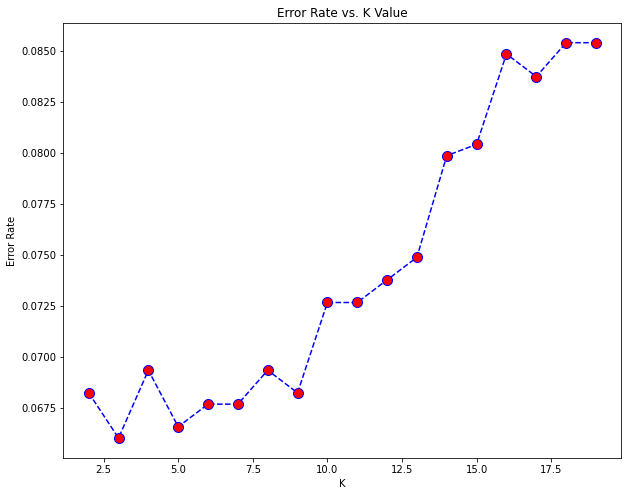

In [71]:
plt.figure(figsize=(10,8))
plt.plot(range(2,20),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
#Here we can see that that after arouns K>15 the error rate 
#just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!
neigh = KNeighborsClassifier(n_neighbors = 15, metric='manhattan', weights='distance')

In [73]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [74]:
neigh.score(X_test, y_test)

0.9550748752079867

In [75]:
y_pred = neigh.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.67      0.53        27
           1       0.47      0.54      0.50        13
           2       0.64      0.70      0.67        10
           3       0.89      1.00      0.94        17
           4       0.40      0.43      0.42        23
           5       1.00      1.00      1.00      1622
           6       0.78      0.55      0.64        89
           7       0.00      0.00      0.00         2

    accuracy                           0.96      1803
   macro avg       0.58      0.61      0.59      1803
weighted avg       0.96      0.96      0.96      1803



In [77]:
print('accuracy %s' % accuracy_score(y_test, y_pred))

accuracy 0.9550748752079867


In [78]:
print(confusion_matrix(y_test, y_pred))

[[  18    1    0    0    1    0    5    2]
 [   1    7    0    0    4    0    1    0]
 [   0    1    7    2    0    0    0    0]
 [   0    0    0   17    0    0    0    0]
 [   3    5    0    0   10    1    4    0]
 [   0    0    4    0    0 1614    4    0]
 [  17    1    0    0   10    0   49   12]
 [   2    0    0    0    0    0    0    0]]


Normalized confusion matrix


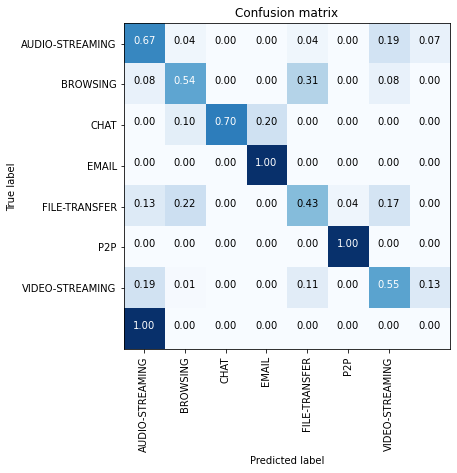

In [79]:
fig = plt.figure()
fig.set_size_inches(6, 6, forward=True)
fig.align_labels()

plot_confusion_matrix(confusion_matrix(y_test, y_pred), normalize=True,
                      title='Confusion matrix', classes= le.inverse_transform([0,1,2,3,4,5,6]))
fig.show()

In [80]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
# # perform permutation importance
# results = permutation_importance(neigh, X_train, y_train, scoring='accuracy')
# # get importance
# importance = results.importances_mean
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


n_feats = X_train.shape[1]

print('Feature  Importance')
for i in range(n_feats):
    X = X_train[:, i].reshape(-1, 1)
    scores = cross_val_score(neigh, X, y_train, cv=3)
    print(f'{i}        {scores.mean():g}')

Feature  Importance
0        0.373355
1        0.413403
2        0.251319
3        0.489711
4        0.502792
5        0.268455
6        0.344534
7        0.535151
8        0.544867
9        0.266677
10        0.151392
11        0.28934
12        0.286127
13        0.277884
14        0.280351
15        0.264573
16        0.242369
17        0.237339


In [ ]:
#Random Forest

In [81]:
#rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy')
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [82]:
rf.score(X_test, y_test)

0.9744869661674986

In [83]:
y_pred = rf.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.85      0.65        27
           1       0.60      0.69      0.64        13
           2       1.00      0.60      0.75        10
           3       0.89      1.00      0.94        17
           4       0.60      0.65      0.63        23
           5       1.00      1.00      1.00      1622
           6       0.92      0.73      0.81        89
           7       0.67      1.00      0.80         2

    accuracy                           0.97      1803
   macro avg       0.77      0.82      0.78      1803
weighted avg       0.98      0.97      0.98      1803



In [85]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9744869661674986


Normalized confusion matrix


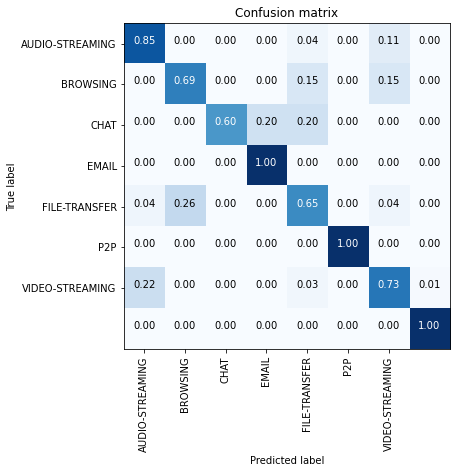

In [86]:
fig = plt.figure()
fig.set_size_inches(6, 6, forward=True)
fig.align_labels()

plot_confusion_matrix(confusion_matrix(y_test, y_pred), normalize=True,
                      title='Confusion matrix', classes= le.inverse_transform([0,1,2,3,4,5,6]))
fig.show()

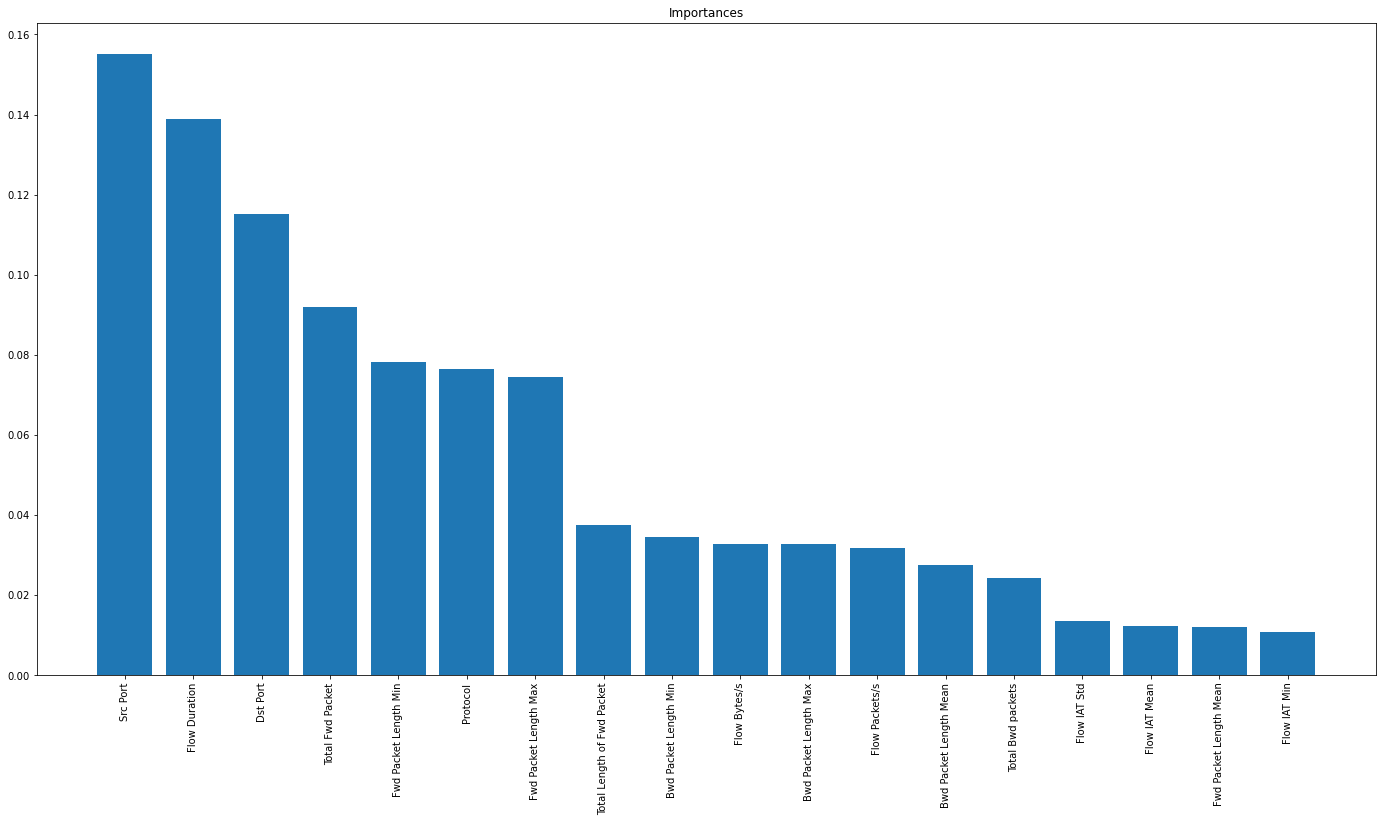

In [87]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_col_names[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.savefig("RF_features.png")

In [88]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=45303820),
 DecisionTreeClassifier(max_features='auto', random_state=2052311520),
 DecisionTreeClassifier(max_features='auto', random_state=1838987426),
 DecisionTreeClassifier(max_features='auto', random_state=1252785249),
 DecisionTreeClassifier(max_features='auto', random_state=671234393),
 DecisionTreeClassifier(max_features='auto', random_state=204684312),
 DecisionTreeClassifier(max_features='auto', random_state=1181885957),
 DecisionTreeClassifier(max_features='auto', random_state=2104640596),
 DecisionTreeClassifier(max_features='auto', random_state=216843789),
 DecisionTreeClassifier(max_features='auto', random_state=1625075915),
 DecisionTreeClassifier(max_features='auto', random_state=1218486864),
 DecisionTreeClassifier(max_features='auto', random_state=1266802064),
 DecisionTreeClassifier(max_features='auto', random_state=874086743),
 DecisionTreeClassifier(max_features='auto', random_state=1679796646),
 DecisionTre

In [ ]:
# Tuning RF model

In [89]:
model = RandomForestClassifier()
param_grid = {'max_depth':[30,40,50],
              'n_estimators':[20,30,40,50],  
              'max_features':['auto','log2'],
              'criterion':['gini','entropy']}
GR = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', cv=6)

In [90]:
df_X = pd.DataFrame(Xn,columns= X_col_names[:-1])
X_m = df_X[feats]
X_n = np.array(X_m)


In [91]:
GR.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [20, 30, 40, 50]},
             scoring='accuracy')

In [92]:
GR.best_score_

0.9900168649504298

In [93]:
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 50}

In [94]:
rf = RandomForestClassifier(max_depth=50, n_estimators=40, max_features='log2', criterion='gini')
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=50, max_features='log2', n_estimators=40)

In [95]:
rf.score(X_test, y_test)

0.9767054908485857

In [96]:
y_pred = rf.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.81      0.67        27
           1       0.60      0.69      0.64        13
           2       1.00      0.70      0.82        10
           3       0.89      1.00      0.94        17
           4       0.62      0.65      0.64        23
           5       1.00      1.00      1.00      1622
           6       0.91      0.78      0.84        89
           7       0.67      1.00      0.80         2

    accuracy                           0.98      1803
   macro avg       0.78      0.83      0.79      1803
weighted avg       0.98      0.98      0.98      1803



In [98]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9767054908485857


Normalized confusion matrix


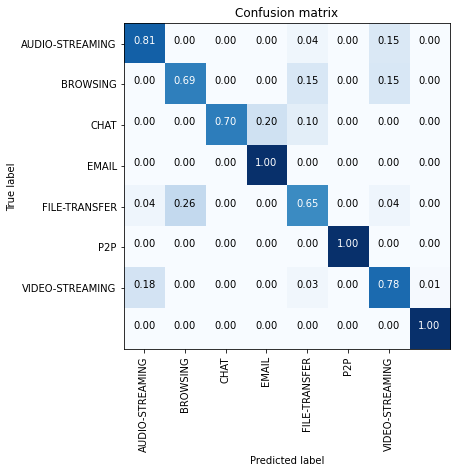

In [99]:
fig = plt.figure()
fig.set_size_inches(6, 6, forward=True)
fig.align_labels()

plot_confusion_matrix(confusion_matrix(y_test, y_pred), normalize=True,
                      title='Confusion matrix', classes= le.inverse_transform([0,1,2,3,4,5,6]))
fig.show()

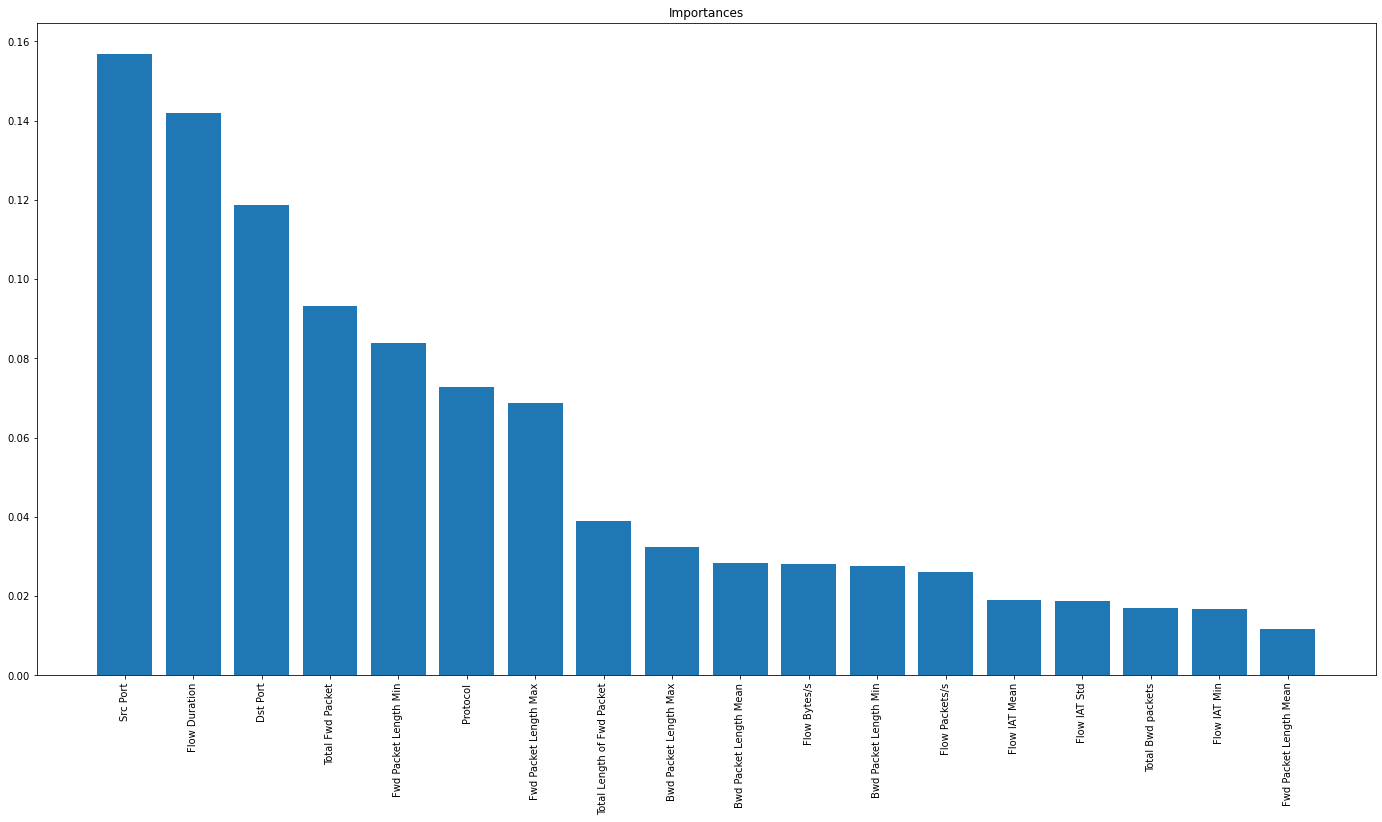

In [100]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_col_names[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.savefig("RF_features.png")

In [ ]:
# Testing Single Prediction

In [101]:
data_single_pred = {'Src Port':[57159],
                    'Dst Port':[443],
                    'FWD Init Win Bytes': [1987],
                   # 'Flow Packets/s':[4914.005],
                    'Flow Duration':[61152761] ,
                    'Fwd Seg Size Min':[32],
                    'Bwd Init Win Bytes':[33],
                    'FIN Flag Count':[1],
                    'Label':[0] ,
                    'Total Fwd Packet':[10],
                     'Flow IAT Mean':[2912036.238],
                    'Total Bwd packets':[12],
                   'Flow Bytes/s':[103.2659834],
                    'Packet Length Mean':[274.5652174],
                    'Total Length of Fwd Packet':[598],
                    'Fwd Packet Length Mean':[59.8],
                    'Down/Up Ratio':[1],
                    'Fwd IAT Std':[150298.159],
                    'Packet Length Variance':[244016.3478]
                   }

In [102]:
test_pred = pd.DataFrame.from_dict(data_single_pred)

In [103]:
X_test_single=np.array(test_pred)
y_pred=rf.predict(X_test_single)

In [104]:
print(y_pred)

[7]


In [105]:
list(le.classes_)

['AUDIO-STREAMING',
 'BROWSING',
 'CHAT',
 'EMAIL',
 'FILE-TRANSFER',
 'P2P',
 'VIDEO-STREAMING',
 'VOIP']

In [106]:
data_single_pred_2 = {'Src Port':[59286],
                    'Dst Port':[53],
                    'FWD Init Win Bytes': [0],
                   # 'Flow Packets/s':[4914.005],
                    'Flow Duration':[329654] ,
                    'Fwd Seg Size Min':[8],
                    'Bwd Init Win Bytes':[0],
                    'FIN Flag Count':[0],
                    'Label':[0] ,
                    'Total Fwd Packet':[2],
                     'Flow IAT Mean':[109884.6667],
                    'Total Bwd packets':[2],
                   'Flow Bytes/s':[606.6967184],
                    'Packet Length Mean':[47.8],
                    'Total Length of Fwd Packet':[78],
                    'Fwd Packet Length Mean':[39],
                    'Down/Up Ratio':[1],
                    'Fwd IAT Std':[0],
                    'Packet Length Variance':[163.2]
                   }

In [107]:
test_pred_2 = pd.DataFrame.from_dict(data_single_pred)

In [108]:
X_test_single_2=np.array(test_pred_2)
y_pred_2=rf.predict(X_test_single_2)

In [109]:
print(y_pred_2)

[7]
